In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

C:\Users\SAMPARK\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [54]:
# Load the CSV file 
df=pd.read_csv(r"D:\downloads1\customer_segmentation_data.csv")
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [3]:
# Checking the rows and columns 
df.shape

(1000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [5]:
# Checking if there are any null values 
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#Statistics of the data 
df.describe()


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [8]:
#I don't need the id column hence i'm droping it 
df.drop(["id"],axis=1, inplace=True)

In [9]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,Female,99342,90,3,24,Groceries,113.53
1,21,Female,78852,60,2,42,Sports,41.93
2,60,Female,126573,30,2,28,Clothing,424.36
3,40,Other,47099,74,9,5,Home & Garden,991.93
4,65,Female,140621,21,3,25,Electronics,347.08


In [11]:
df.select_dtypes(include="object").head(10)

,gender,preferred_category
0,Female,Groceries
1,Female,Sports
2,Female,Clothing
3,Other,Home & Garden
4,Female,Electronics
5,Other,Home & Garden
6,Other,Clothing
7,Male,Groceries
8,Male,Sports
9,Female,Electronics


<Axes: >

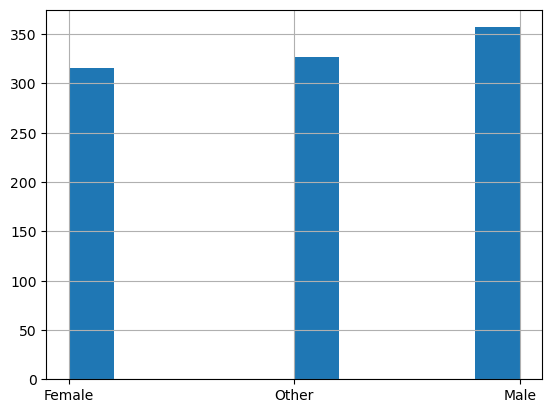

In [12]:
#Exploratory data analysis 
df["gender"].hist()

In [13]:
df["preferred_category"].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

<Axes: >

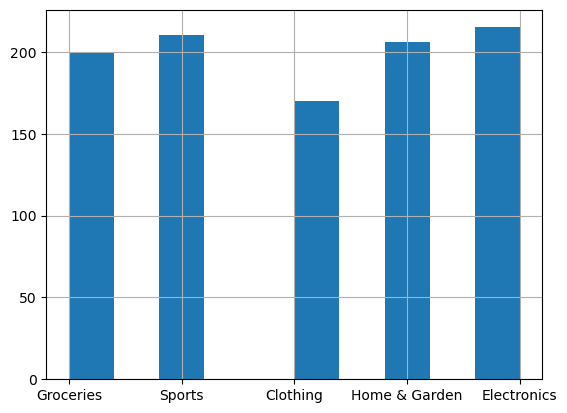

In [14]:
df["preferred_category"].hist()

In [15]:
print(df['gender'].value_counts())

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64


In [16]:
print(df['preferred_category'].value_counts())

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64


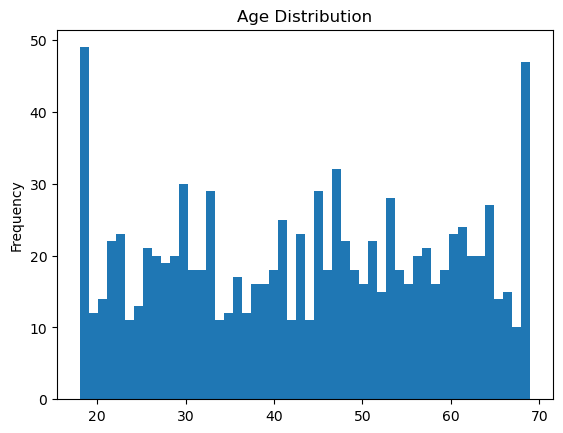

In [17]:
df['age'].plot(kind='hist', bins=50, title='Age Distribution')
plt.show()

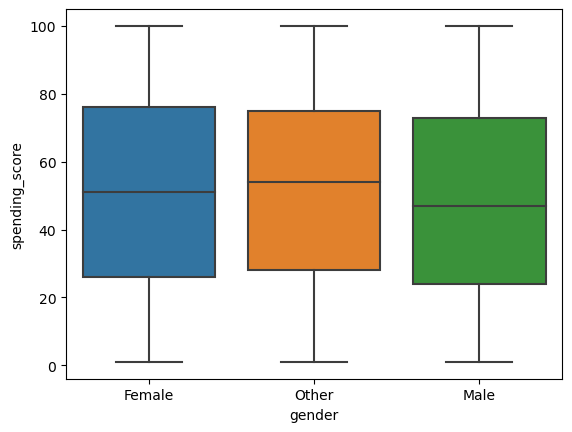

In [18]:
sns.boxplot(x='gender', y='spending_score', data=df)
plt.show()

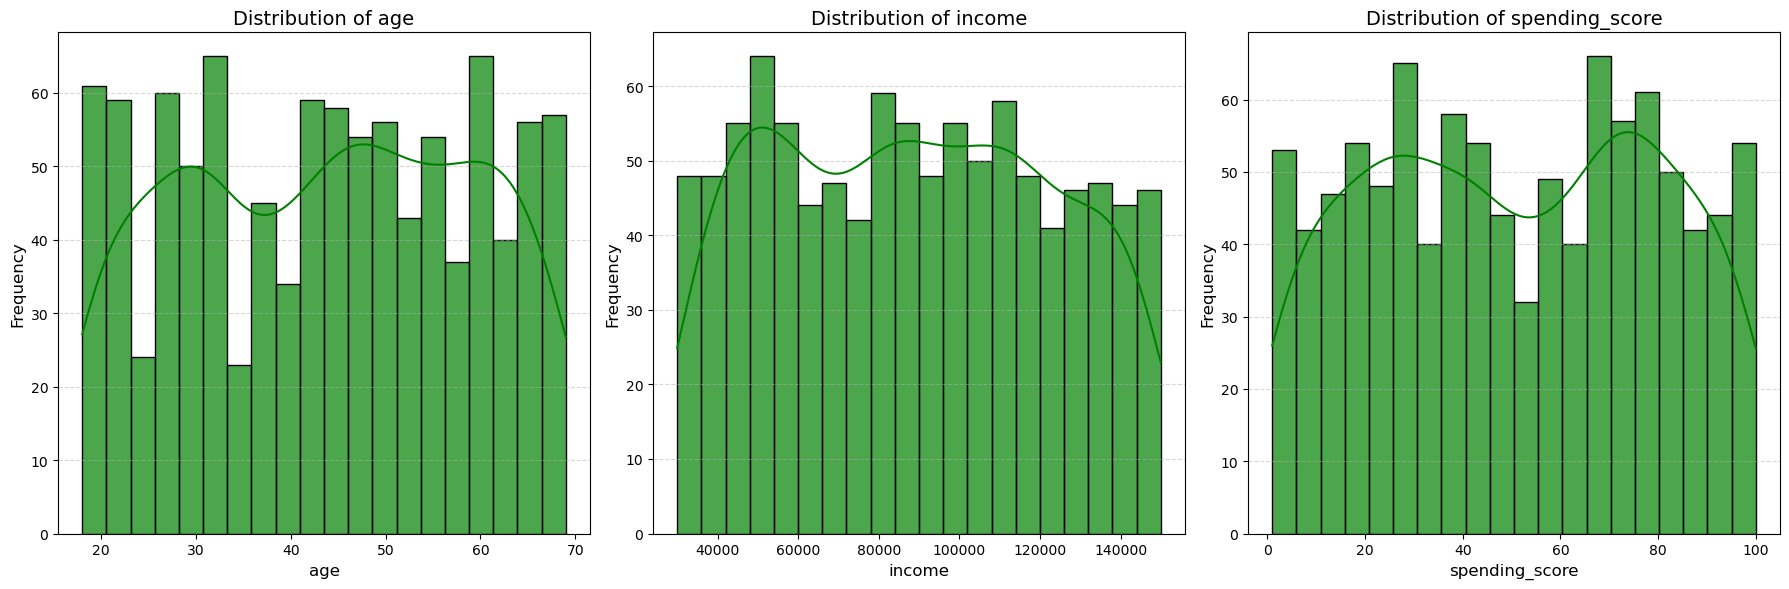

In [19]:
# Visualization Code for Distribution Plots
plt.figure(figsize=(18, 6))  # Set the overall figure size
columns = ['age', 'income', 'spending_score']  # Columns to visualize

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)  # Create subplots: 1 row, 3 columns
    sns.histplot(df[col], bins=20, kde=True, color='green', alpha=0.7)  # Histogram with KDE
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add light gridlines for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


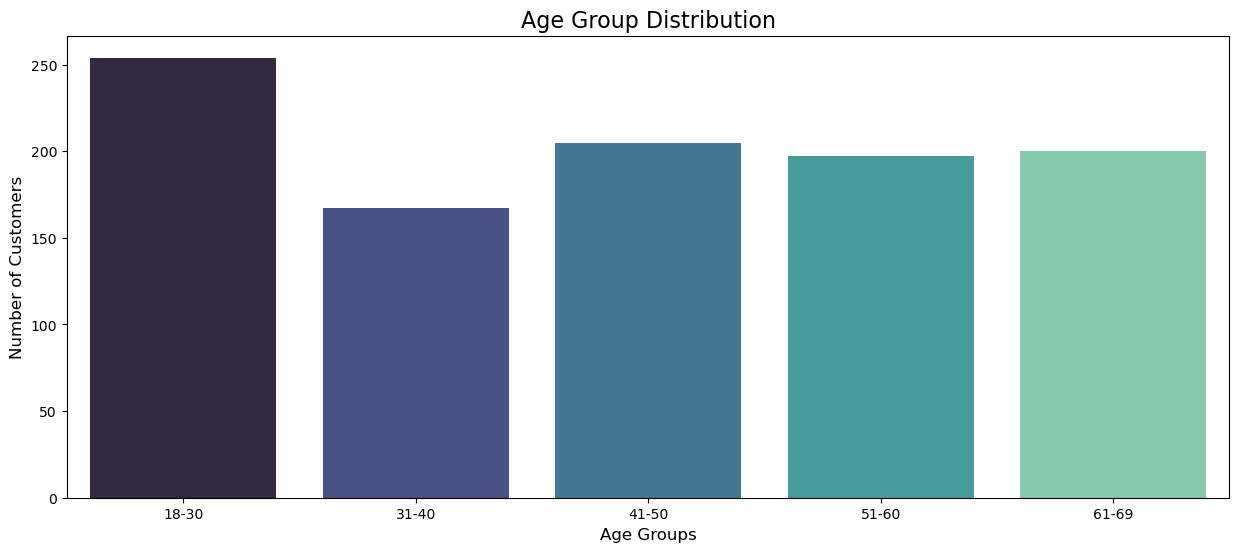

In [20]:
# Create age group columns
df['age_18_30'] = (df['age'] >= 18) & (df['age'] <= 30)
df['age_31_40'] = (df['age'] >= 31) & (df['age'] <= 40)
df['age_41_50'] = (df['age'] >= 41) & (df['age'] <= 50)
df['age_51_60'] = (df['age'] >= 51) & (df['age'] <= 60)
df['age_61_69'] = (df['age'] >= 60) & (df['age'] <= 69)

# Create age labels and count occurrences
agex = ["18-30", "31-40", "41-50", "51-60", "61-69"]
agey = [
    len(df[df['age_18_30']].values), 
    len(df[df['age_31_40']].values), 
    len(df[df['age_41_50']].values), 
    len(df[df['age_51_60']].values), 
    len(df[df['age_61_69']].values)
]

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Age Group Distribution", fontsize=16)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()


In [21]:
print(df['age_18_30'].value_counts())

age_18_30
False    746
True     254
Name: count, dtype: int64


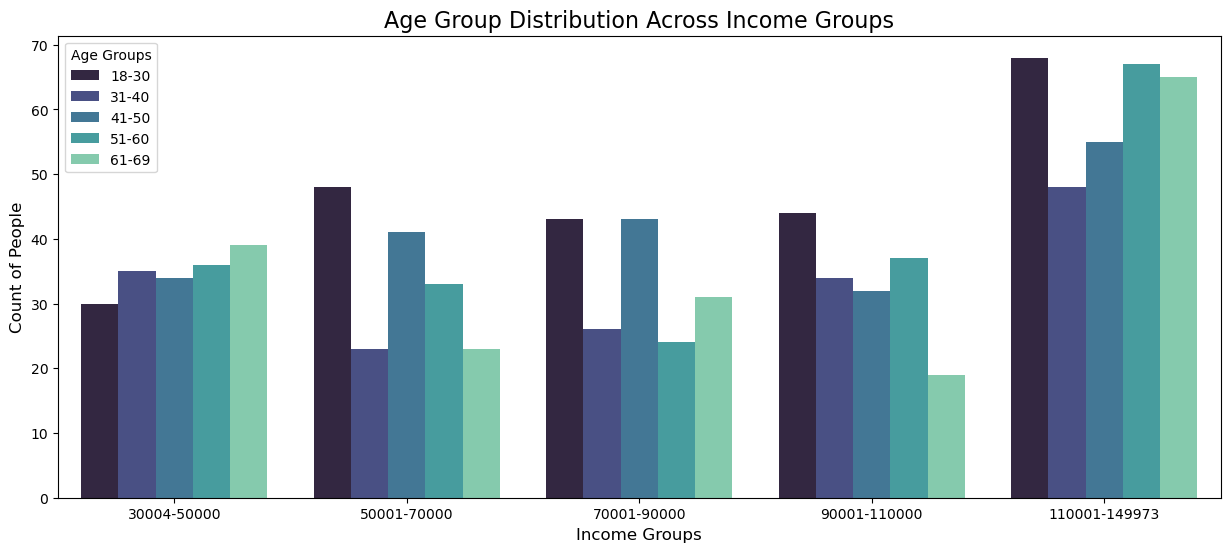

In [22]:
df['Income_Group'] = pd.cut(df['income'], bins=[30004, 50000, 70000, 90000, 110000, 149973], 
                            labels=["30004-50000", "50001-70000", "70001-90000", "90001-110000", "110001-149973"])
df['Age_Group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 69], labels=["18-30", "31-40", "41-50", "51-60", "61-69"])

# Count the number of people in each combination of age and income groups
grouped_df = df.groupby(['Income_Group', 'Age_Group']).size().reset_index(name='Count')

# Plot the result
plt.figure(figsize=(15, 6))
sns.barplot(x='Income_Group', y='Count', hue='Age_Group', data=grouped_df, palette="mako")
plt.title("Age Group Distribution Across Income Groups", fontsize=16)
plt.xlabel("Income Groups", fontsize=12)
plt.ylabel("Count of People", fontsize=12)
plt.legend(title="Age Groups")
plt.show()

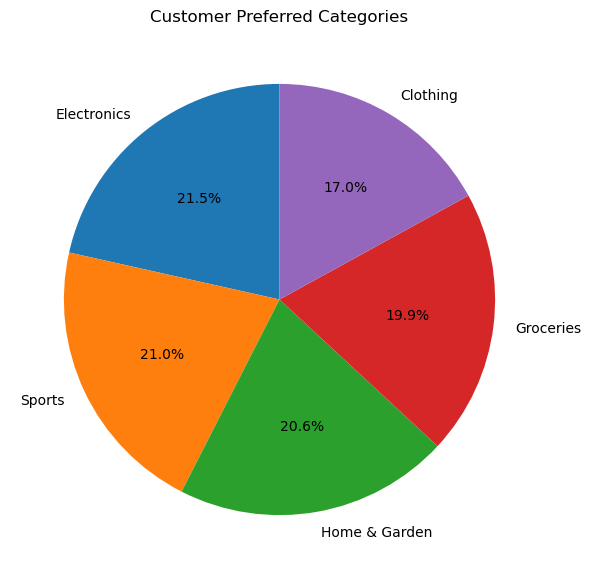

In [23]:
# Get the count of each category
category_counts = df['preferred_category'].value_counts()

# Plot the pie chart
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(7, 7))
plt.title('Customer Preferred Categories')
plt.ylabel('')  # To remove the ylabel
plt.show()

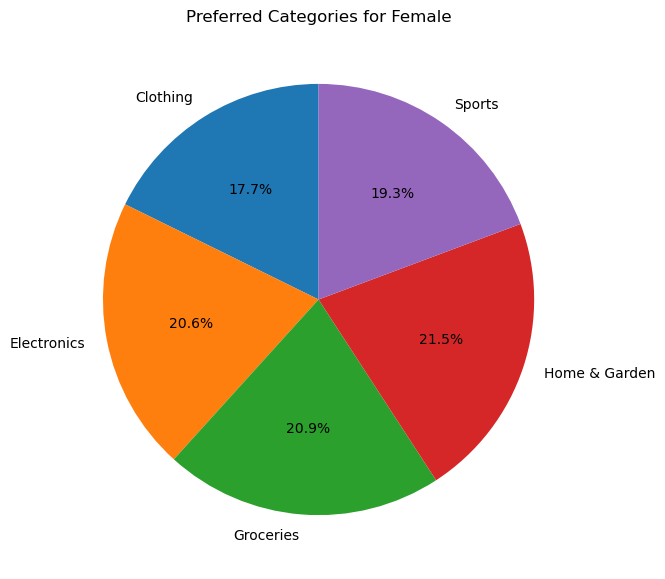

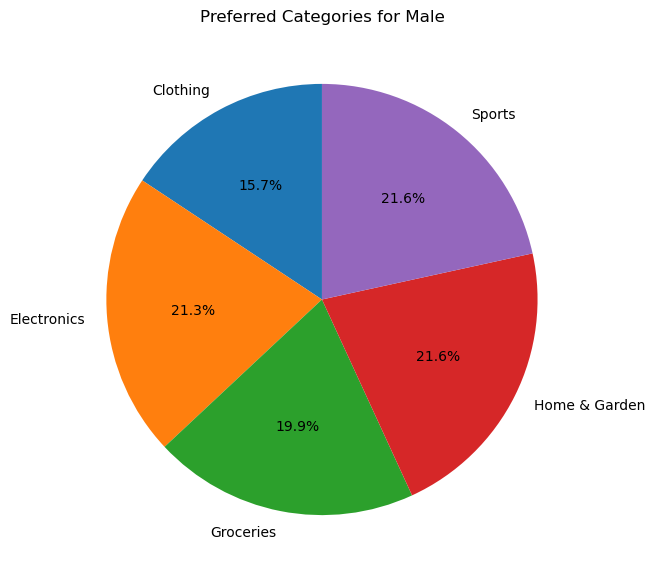

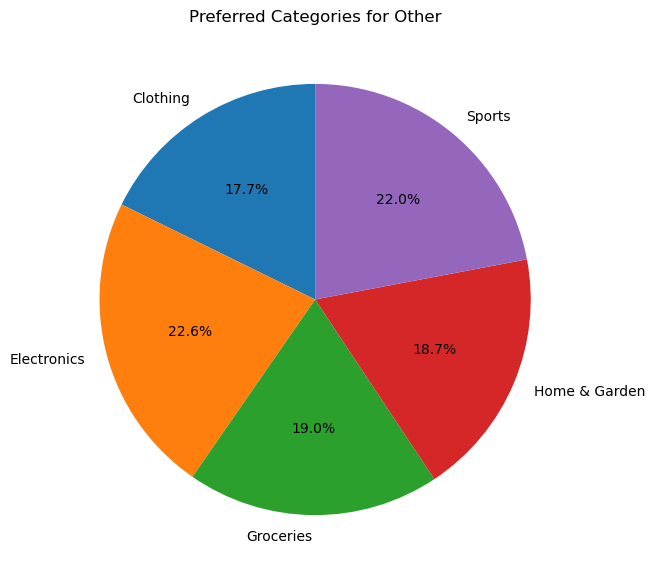

In [24]:
gender_category_counts = df.groupby(['gender', 'preferred_category']).size().unstack()

# Plot pie charts for each gender
for gender in gender_category_counts.index:
    plt.figure(figsize=(7, 7))
    gender_data = gender_category_counts.loc[gender]
    gender_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=gender_data.index)
    plt.title(f'Preferred Categories for {gender}')
    plt.ylabel('')  # To remove the ylabel
    plt.show()

In [25]:
# Calculate RFM metrics from data set 
df['Recency'] = 1 / (df['membership_years'])  # Approximating recency
df['Frequency'] = df['purchase_frequency']       # Directly using purchase_frequency
df['Monetary'] = df['last_purchase_amount']      # Directly using last_purchase_amount

# Create the RFM DataFrame
rfm = df[['Recency', 'Frequency', 'Monetary']]




In [26]:
# Standardize numeric feature, i use standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)

# Convert normalized data back to a DataFrame
rfm_normalized_df = pd.DataFrame(rfm_normalized, columns=['Recency', 'Frequency', 'Monetary'])

# Inspect normalized data
print(rfm_normalized_df.head())

    Recency  Frequency  Monetary
0  0.161045  -0.182348 -1.281540
1  0.805667   1.082005 -1.523763
2  0.805667   0.098620 -0.230005
3 -0.698451  -1.516943  1.690080
4  0.161045  -0.112106 -0.491443


In [27]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_18_30,age_31_40,age_41_50,age_51_60,age_61_69,Income_Group,Age_Group,Recency,Frequency,Monetary
0,38,Female,99342,90,3,24,Groceries,113.53,False,True,False,False,False,90001-110000,31-40,0.333333,24,113.53
1,21,Female,78852,60,2,42,Sports,41.93,True,False,False,False,False,70001-90000,18-30,0.500000,42,41.93
2,60,Female,126573,30,2,28,Clothing,424.36,False,False,False,True,True,110001-149973,51-60,0.500000,28,424.36
3,40,Other,47099,74,9,5,Home & Garden,991.93,False,True,False,False,False,30004-50000,31-40,0.111111,5,991.93
4,65,Female,140621,21,3,25,Electronics,347.08,False,False,False,False,True,110001-149973,61-69,0.333333,25,347.08


In [28]:
print(rfm_normalized_df.columns)

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')


In [29]:
df = df.join(rfm_normalized_df, rsuffix='_normalized')

In [30]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_18_30,age_31_40,...,age_51_60,age_61_69,Income_Group,Age_Group,Recency,Frequency,Monetary,Recency_normalized,Frequency_normalized,Monetary_normalized
0,38,Female,99342,90,3,24,Groceries,113.53,False,True,...,False,False,90001-110000,31-40,0.333333,24,113.53,0.161045,-0.182348,-1.281540
1,21,Female,78852,60,2,42,Sports,41.93,True,False,...,False,False,70001-90000,18-30,0.500000,42,41.93,0.805667,1.082005,-1.523763
2,60,Female,126573,30,2,28,Clothing,424.36,False,False,...,True,True,110001-149973,51-60,0.500000,28,424.36,0.805667,0.098620,-0.230005
3,40,Other,47099,74,9,5,Home & Garden,991.93,False,True,...,False,False,30004-50000,31-40,0.111111,5,991.93,-0.698451,-1.516943,1.690080
4,65,Female,140621,21,3,25,Electronics,347.08,False,False,...,False,True,110001-149973,61-69,0.333333,25,347.08,0.161045,-0.112106,-0.491443


In [31]:
# Clustering K-Means 
from sklearn.cluster import KMeans

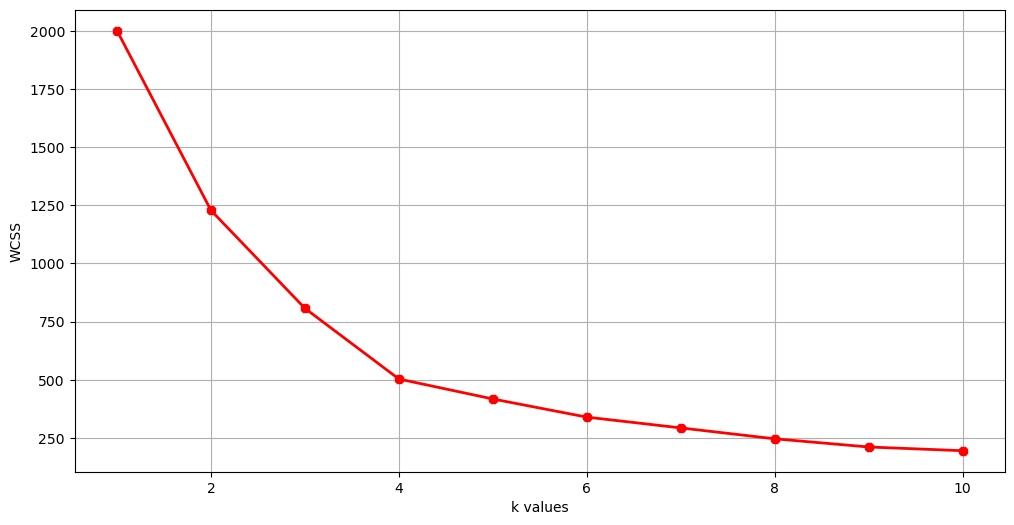

In [32]:
# To show elbow curve, in two features 
X1= df.loc[:, ["Frequency_normalized","Monetary_normalized"]].values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

In [33]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[2 1 1 0 2 1 1 3 0 0 2 3 1 2 0 1 2 3 2 2 0 3 0 2 3 1 2 3 2 0 0 2 1 1 3 0 1
 3 1 1 3 1 1 3 3 1 2 2 2 0 1 3 0 1 3 0 2 0 0 2 2 1 0 2 2 3 2 1 2 3 2 3 0 2
 1 3 3 2 2 3 3 2 2 1 2 1 3 1 0 0 1 3 2 2 0 2 0 3 3 1 2 1 3 2 3 3 3 0 1 3 3
 0 2 1 2 1 3 3 3 3 0 2 1 0 0 1 2 1 0 0 3 1 3 2 3 1 1 0 2 1 3 1 0 2 0 0 3 0
 2 1 2 2 3 0 3 0 3 1 0 1 0 0 1 3 1 3 2 2 1 3 1 3 3 0 2 0 1 1 1 3 2 0 1 1 1
 1 2 2 3 0 1 1 1 3 2 1 3 2 2 2 3 3 2 1 3 0 1 2 3 2 2 1 3 3 1 3 3 2 0 3 1 0
 3 2 2 1 3 2 3 2 1 2 1 2 2 3 0 0 3 3 2 0 3 0 0 1 2 1 3 2 1 3 2 3 2 2 3 0 1
 0 1 3 3 0 3 0 0 3 1 1 0 2 0 3 0 1 0 0 3 0 3 0 3 1 1 1 2 1 3 0 3 0 3 3 0 1
 2 1 1 0 2 1 3 3 0 1 2 3 2 1 2 3 1 3 2 3 0 0 0 1 1 2 3 3 1 3 3 3 2 1 3 3 2
 2 1 0 1 3 1 1 0 0 1 1 0 2 2 1 0 2 1 2 3 0 2 3 1 0 0 3 3 3 3 0 2 3 0 1 3 3
 2 2 3 1 3 1 0 1 2 2 3 2 1 1 0 3 0 3 1 0 0 2 0 2 3 3 3 2 3 0 0 2 1 2 0 0 0
 3 0 3 2 0 2 0 3 0 0 3 3 3 3 2 1 2 1 0 0 3 2 2 2 3 3 3 0 2 0 1 0 3 1 1 1 1
 1 1 3 2 2 3 1 1 2 3 2 0 1 2 0 0 0 0 3 2 2 2 3 3 3 1 3 3 3 1 3 1 1 0 2 2 1
 1 3 2 3 2 1 0 2 3 2 3 0 

In [34]:
print(kmeans.cluster_centers_)

[[-0.86680478  0.94170629]
 [ 0.77487495 -0.92989557]
 [-0.96160213 -0.84592806]
 [ 0.80978775  0.79827994]]


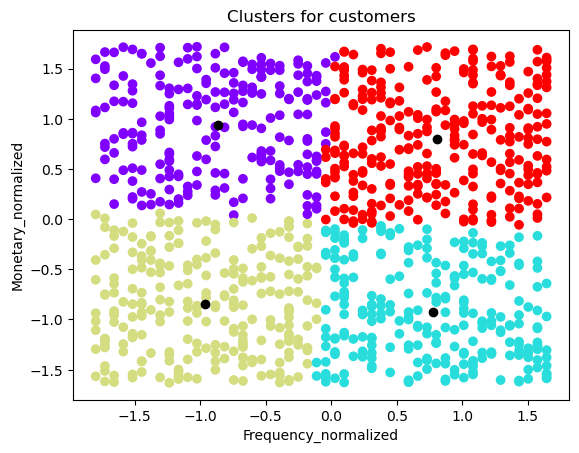

In [35]:
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters for customers")
plt.xlabel("Frequency_normalized")
plt.ylabel("Monetary_normalized")
plt.show()

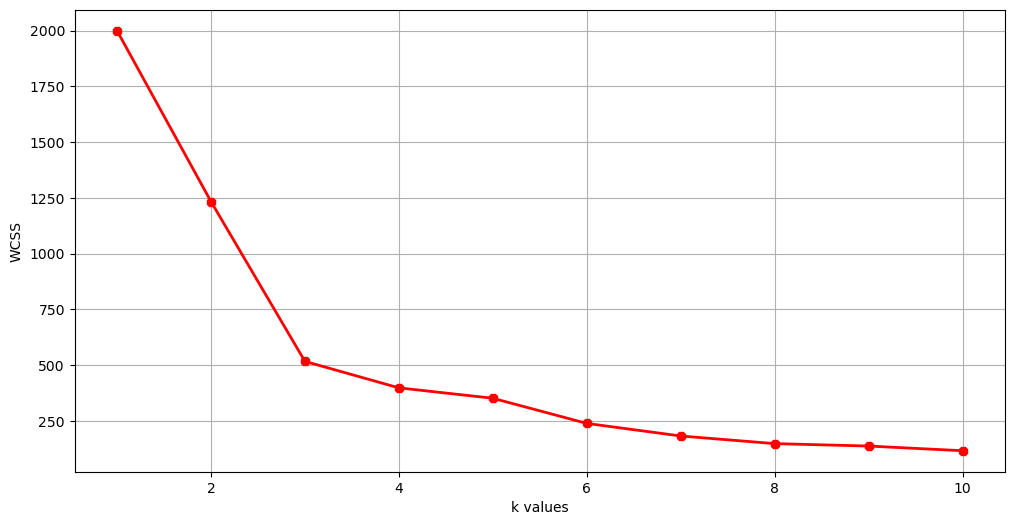

In [36]:
X2= df.loc[:, ["Recency_normalized","Monetary_normalized"]].values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

In [37]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(X2)
print(label)

[0 0 0 1 0 0 0 1 1 1 0 2 0 0 1 0 0 2 0 0 1 1 2 0 1 0 0 1 0 1 1 0 0 0 1 2 0
 1 0 0 2 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 2 1 1 0 0 0 0 2 1 2 0
 0 1 2 0 0 1 1 2 0 0 0 0 1 0 1 1 2 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1
 1 0 0 0 0 1 1 1 1 1 0 0 1 2 0 0 0 2 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 0 0 0 2 1 1 1 1 1 0 1 0 2 2 0 1 0 1 0 0 0 1 0 1 1 1 2 1 0 0 0 1 0 1 0 0 0
 0 0 0 2 2 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 2 1 1 0 1 1 0 1 1 0 1
 1 0 0 0 1 0 1 0 0 0 0 0 2 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 2 1 1 1 2 1 1 1 0 2 0 1 0 1 2 1 1 1 2 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 2 1 1 0 0 0 1 1 2 1 1 0 2 0 1 2 1
 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 2 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 2 0 1 0 2 0 0 0 1 0 0 2 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 2 1 1 1 0 0 0 1 1 1 2 0 1 0 1 1 0 2 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 2 0 1 2 1 1 1 0 0 0 2 1 1 0 1 1 1 2 1 2 0 1 0 0 0
 0 1 0 1 0 0 1 2 1 2 1 2 

In [38]:
print(kmeans.cluster_centers_)

[[-0.31938884 -0.86599794]
 [-0.25512266  0.88627329]
 [ 2.73953319 -0.01357234]]


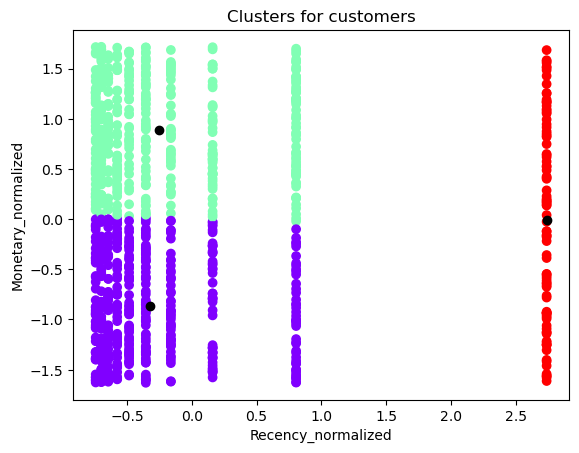

In [39]:
plt.scatter(X2[:,0],X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Clusters for customers")
plt.xlabel("Recency_normalized")
plt.ylabel("Monetary_normalized")
plt.show()

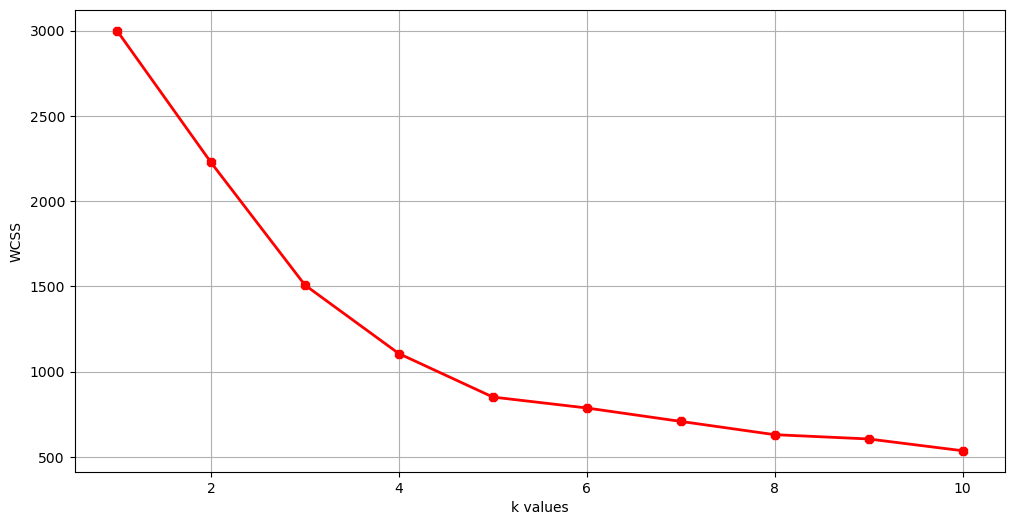

In [53]:
# To show elbow curve all three features 
X3=df.loc[:, ["Recency_normalized","Frequency_normalized","Monetary_normalized"]].values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.show()

In [41]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

[2 2 2 1 2 2 2 1 1 0 0 3 2 0 1 2 0 3 0 0 0 1 3 0 2 2 0 1 0 1 1 0 2 2 1 3 2
 1 2 2 3 2 2 1 1 2 0 0 0 1 2 1 1 2 1 1 0 1 0 0 0 2 0 4 0 1 0 2 0 2 4 1 3 0
 2 1 3 0 0 1 1 4 0 2 0 2 1 2 0 0 4 1 0 0 1 0 0 1 1 2 0 2 1 0 1 1 1 1 2 1 1
 1 0 2 2 2 1 1 1 1 1 2 2 0 3 2 0 2 3 1 1 2 1 0 2 2 2 1 0 2 1 2 1 0 1 1 1 1
 0 2 0 4 1 0 1 1 1 2 1 2 3 3 2 2 2 1 0 0 2 1 2 1 1 0 4 1 2 2 2 1 0 1 2 2 2
 2 2 0 3 3 2 2 2 1 0 2 1 2 0 0 1 1 0 2 1 1 2 0 1 0 0 4 1 1 2 1 1 0 1 1 2 1
 1 0 0 2 1 0 1 2 2 2 2 0 4 1 1 1 1 1 0 1 1 1 1 2 2 2 1 0 2 1 0 1 2 0 1 0 2
 1 2 1 1 0 1 0 1 2 2 2 1 0 1 1 1 4 1 1 1 3 1 1 1 2 4 2 0 2 1 3 1 1 1 3 1 2
 0 2 2 1 0 2 2 1 1 2 0 1 0 2 2 1 2 1 0 2 3 0 0 2 2 2 1 1 4 1 1 2 4 2 1 3 0
 0 2 1 2 1 2 2 0 1 2 2 0 0 0 2 1 0 2 0 2 1 0 1 2 3 1 1 1 1 1 1 2 1 0 2 1 1
 0 0 3 2 1 2 3 2 0 0 1 2 2 4 1 1 0 1 2 0 1 0 0 0 1 1 2 0 1 0 1 0 2 0 1 1 0
 1 1 1 0 1 0 1 1 1 0 1 2 1 1 0 2 0 4 1 1 1 0 0 2 1 1 1 3 0 0 2 1 1 2 4 2 2
 2 2 1 0 0 1 2 2 0 1 0 0 4 0 0 3 1 1 1 0 2 0 3 1 1 2 1 1 1 4 1 4 2 1 2 2 2
 2 1 0 1 0 2 0 4 1 4 1 3 

In [42]:
print(kmeans.cluster_centers_)

[[-0.25835021 -1.15968272 -0.34963543]
 [-0.27453786  0.35772097  0.93873076]
 [-0.33315965  0.67792312 -0.89497176]
 [ 2.73953319 -0.27552575  0.80235625]
 [ 2.73953319  0.14901042 -0.88271366]]


In [43]:
from mpl_toolkits.mplot3d import Axes3D


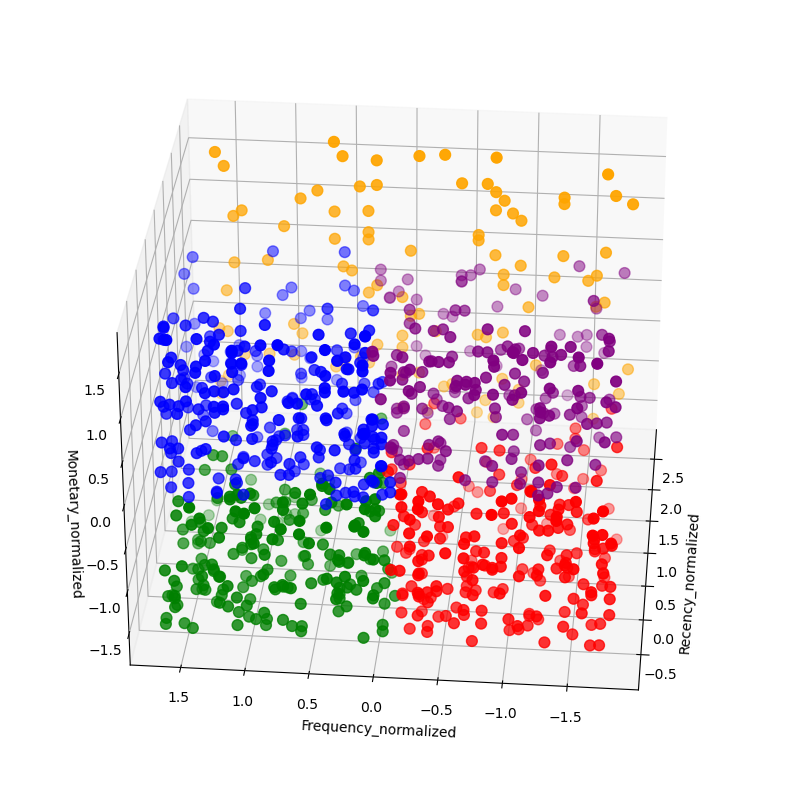

In [44]:
# 3d Scatter plot for all three features 
clusters= kmeans.fit_predict(X3)
df["label"]= clusters
fig= plt.figure(figsize=(20, 10))
ax= fig.add_subplot(111, projection= '3d')
ax.scatter(df.Recency_normalized[df.label==0], df["Frequency_normalized"][df.label==0], df["Monetary_normalized"][df.label ==0], c='blue', s= 60)
ax.scatter(df.Recency_normalized[df.label==1], df["Frequency_normalized"][df.label==1], df["Monetary_normalized"][df.label ==1], c='red', s= 60)
ax.scatter(df.Recency_normalized[df.label==2], df["Frequency_normalized"][df.label==2], df["Monetary_normalized"][df.label ==2], c='green', s= 60)
ax.scatter(df.Recency_normalized[df.label==3], df["Frequency_normalized"][df.label==3], df["Monetary_normalized"][df.label ==3], c='orange', s= 60)
ax.scatter(df.Recency_normalized[df.label==4], df["Frequency_normalized"][df.label==4], df["Monetary_normalized"][df.label ==4], c='purple', s= 60)
ax.view_init(30, 185)
plt.xlabel("Recency_normalized")
plt.ylabel("Frequency_normalized")
ax.set_zlabel('Monetary_normalized')
plt.show()

In [45]:
# I'm use hierarchical clustring 
import scipy.cluster.hierarchy as sch

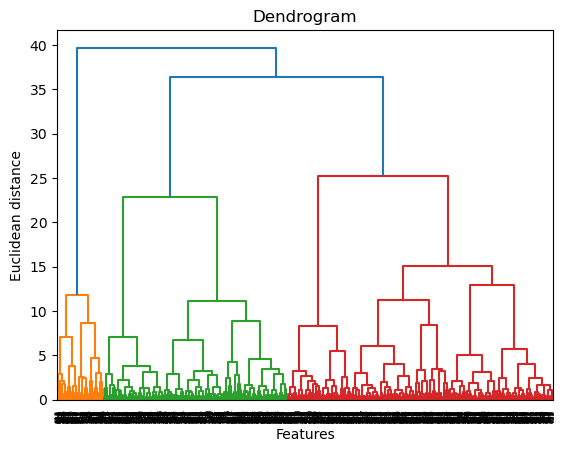

In [46]:
dendrogrm = sch.dendrogram(sch.linkage(X3, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Euclidean distance')
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(X3)
y_hc

array([2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2,

In [50]:
df["Cluster"] = y_hc

<Axes: xlabel='Frequency_normalized', ylabel='Monetary_normalized'>

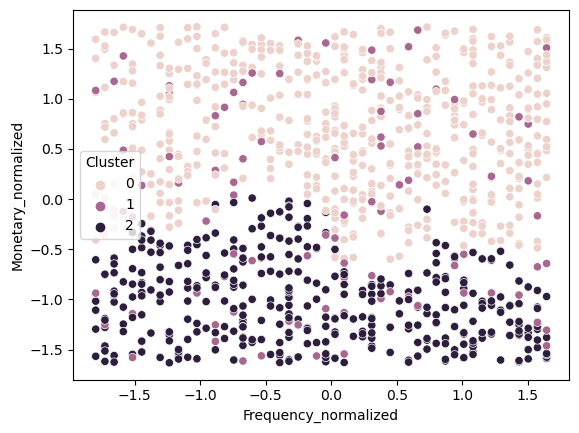

In [51]:
# Lets do a scatterplot of these newly created clusters
sns.scatterplot(x='Frequency_normalized',y='Monetary_normalized', data=df, hue='Cluster')

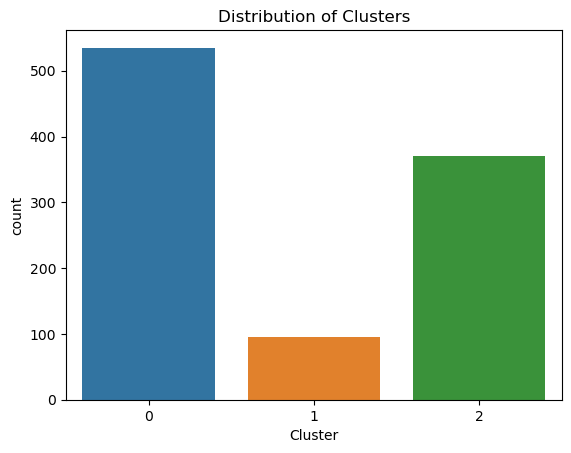

In [52]:
# lets plot the distribution of created clusters
pl = sns.countplot(x=df["Cluster"])
pl.set_title("Distribution of Clusters")
plt.show()